In [2]:
import os
import numpy as np # linear algebra
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statistics import mean 
from matplotlib import pyplot

import optuna

from sklearn import linear_model, ensemble, datasets, model_selection
from sklearn.metrics import classification_report

from sklearn.utils import resample

from sklearn.metrics import r2_score,mean_squared_error
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

import sklearn.svm

In [3]:
import pandas as pd
import pathlib

In [4]:
path = pathlib.Path('C:/Users/Scott/Documents/Repos/Datadive/Mar21-environmental-impact/data/')
path

WindowsPath('C:/Users/Scott/Documents/Repos/Datadive/Mar21-environmental-impact/data')

In [5]:
brownfields = pd.read_csv(path/'brownfields_data_with_county_geoid/brownfields_data_with_county_geoid.csv')

C:\Users\Scott\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (18,19,20,21,22,23,43,44,46,48,53,57,61,62,64,65,67,68,69,74,76,77,78,86,87,89,98) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
brownfields.columns.to_list()

['Grant Recipient Name',
 'Accomplishment Counted',
 'Cooperative Agreement Number',
 'Type of Brownfields Grant',
 'ACRES Property ID',
 'Property Name',
 'Property Address 1',
 'Property City',
 'Property  State',
 'Property Zip Code',
 'IC Data Address',
 'Redev Completion Date',
 'Property Size',
 'Local Parcel Number',
 'Ownership Entity',
 'Current Owner',
 'Did Ownership Change',
 'SFLLP fact into the ownership',
 'Property Latitude',
 'Property Longitude',
 'Horizontal Collection Method',
 'Source Map Scale',
 'Reference Point',
 'Horizontal Reference Datum',
 'Description/History',
 'Past Use: Greenspace (arces)',
 'Past Use: Residential (arces)',
 'Past Use: Commercial (arces)',
 'Past Use: Industrial (arces)',
 'Past Use: Multistory (arces)',
 'Future Use: Multistory (arces)',
 'Assessment Phase',
 'Assessment Start Date',
 'Assessment Completion Date',
 'Source of Assessment Funding',
 'Entity Providing Assmnt Funds',
 'Amt of Assessment Funding',
 'Cleanup Required',
 'Cnt

In [ ]:
'Cleanup Completion Date'

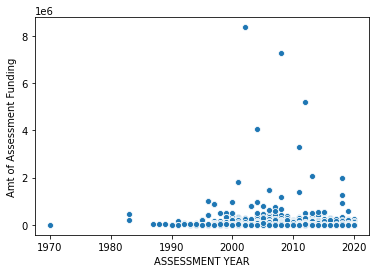

In [41]:
#sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x='ASSESSMENT YEAR', y = 'Amt of Assessment Funding', data=brownfields)
#ax.set_xlim(0,500000)
#ax.set_ylim(0,6000000)

(10, 6000000)

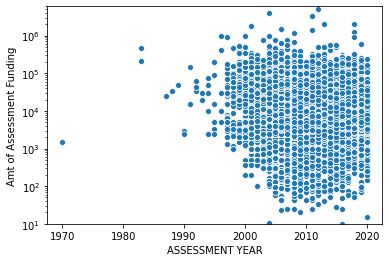

In [49]:
ax = sns.scatterplot(x='ASSESSMENT YEAR', y = 'Amt of Assessment Funding', data=brownfields)
ax.set(yscale="log")
ax.set_ylim(10,6000000)

### Classfication Model

In [97]:
brownfield_subset = brownfields[['Cleanup Required', 'Amt of Assessment Funding', 'Cntmnt Fnd-Arsenic',
                                 #'Past Use: Greenspace (arces)', 'Past Use: Residential (arces)',
                                 #'Past Use: Commercial (arces)', 'Past Use: Industrial (arces)',
                                 'Property  State',
                                 'Cntmnt Fnd-Asbestos', 'Cntmnt Fnd-Chromium', 'Cntmnt Fnd-Lead',
                                 'Cntmnt Fnd-Mercury', 'Cntmnt Fnd-PAHs', 'Cntmnt Fnd-PCBs', 
                                 'Cntmnt Fnd-Petroleum',
 'Cntmnt Fnd-SVOCs',
 'Cntmnt Fnd-VOCs',
 '2010 % Below Poverty',
                                 'ASSESSMENT YEAR'#,'2010 Median Income', '2010 % Low Income', '2010 % Vacant Housing', '2010 % Unemployed'
]]

In [98]:
brownfield_subset

,Cleanup Required,Amt of Assessment Funding,Cntmnt Fnd-Arsenic,Property State,Cntmnt Fnd-Asbestos,Cntmnt Fnd-Chromium,Cntmnt Fnd-Lead,Cntmnt Fnd-Mercury,Cntmnt Fnd-PAHs,Cntmnt Fnd-PCBs,Cntmnt Fnd-Petroleum,Cntmnt Fnd-SVOCs,Cntmnt Fnd-VOCs,2010 % Below Poverty,ASSESSMENT YEAR
0,N,NaN,NaN,MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.41,NaN
1,U,240.00,NaN,MN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,38.89,2006.0
2,Y,132.53,NaN,MO,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,53.78,2008.0
3,Y,132.53,NaN,MO,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,53.36,2008.0
4,U,132.53,NaN,MO,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,53.36,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78522,N,2930.00,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.86,2020.0
78523,U,1517.00,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.86,2020.0
78524,Y,3333.00,NaN,ND,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,20.00,2020.0
78525,Y,250.00,NaN,ND,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,20.00,2020.0


In [99]:
brownfield_subset['Cleanup Required'].value_counts()

Y    34388
U    19712
N    19275
u        5
Name: Cleanup Required, dtype: int64

In [100]:
brownfield_subset['Cntmnt Fnd-Arsenic'].value_counts(dropna=False)

NaN    70035
Y       8465
N         27
Name: Cntmnt Fnd-Arsenic, dtype: int64

In [101]:
brownfield_subset['Cntmnt Fnd-Lead'].value_counts(dropna=False)

NaN    53473
Y      23993
N       1060
x          1
Name: Cntmnt Fnd-Lead, dtype: int64

In [103]:
brownfield_subset['Property  State'].value_counts(dropna=False)

MI    7037
CA    3665
IN    3511
OH    3449
IL    3402
MA    2941
WI    2913
FL    2792
MO    2727
ME    2551
PA    2498
VT    2045
IA    1974
NC    1854
TX    1752
MN    1669
CO    1636
AZ    1576
OK    1499
KS    1492
MT    1490
CT    1469
NY    1449
ID    1374
NH    1337
OR    1217
WA    1185
RI    1163
NV    1150
SC    1075
MS    1060
NJ     987
KY     926
WV     915
LA     912
VA     780
AL     745
SD     733
GA     687
ND     657
AR     629
NE     549
TN     498
AK     383
NM     383
UT     371
MD     351
WY     284
DE     221
HI     216
PR     190
DC      79
MP      39
VI      20
GU      17
AS       3
Name: Property  State, dtype: int64

In [56]:
#brownfield_subset['Amount of Cleanup Funding'].value_counts(dropna=False)

In [57]:
#funding = brownfield_subset[['Amt of Assessment Funding', 'Amount of Cleanup Funding']]
#funding_clean = funding.dropna()

(0.0, 6000000.0)

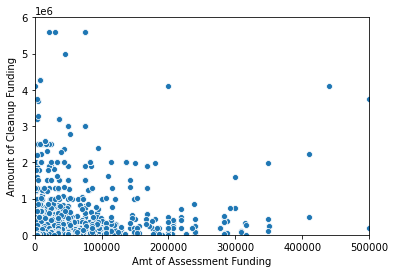

In [58]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x='Amt of Assessment Funding', y = 'Amount of Cleanup Funding', data=brownfields)
ax.set_xlim(0,500000)
ax.set_ylim(0,6000000)

In [104]:
brownfield_subset_dummy = pd.get_dummies(brownfield_subset, columns = ['Cntmnt Fnd-Arsenic',
 'Cntmnt Fnd-Asbestos',
 'Cntmnt Fnd-Chromium',
 'Cntmnt Fnd-Lead',
 'Cntmnt Fnd-Mercury',
 'Cntmnt Fnd-PAHs',
 'Cntmnt Fnd-PCBs',
 'Cntmnt Fnd-Petroleum',
 'Cntmnt Fnd-SVOCs',
 'Cntmnt Fnd-VOCs', 'Property  State'])
brownfield_subset_dummy

,Cleanup Required,Amt of Assessment Funding,2010 % Below Poverty,ASSESSMENT YEAR,Cntmnt Fnd-Arsenic_N,Cntmnt Fnd-Arsenic_Y,Cntmnt Fnd-Asbestos_N,Cntmnt Fnd-Asbestos_Y,Cntmnt Fnd-Chromium_N,Cntmnt Fnd-Chromium_Y,...,Property State_TN,Property State_TX,Property State_UT,Property State_VA,Property State_VI,Property State_VT,Property State_WA,Property State_WI,Property State_WV,Property State_WY
0,N,NaN,14.41,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U,240.00,38.89,2006.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Y,132.53,53.78,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Y,132.53,53.36,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U,132.53,53.36,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78522,N,2930.00,42.86,2020.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78523,U,1517.00,30.86,2020.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78524,Y,3333.00,20.00,2020.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
78525,Y,250.00,20.00,2020.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
full_rows_brown = brownfield_subset_dummy.dropna(subset=['Amt of Assessment Funding', '2010 % Below Poverty', 
                                                         'ASSESSMENT YEAR'])

In [106]:
full_rows_brown['Cleanup Required'].value_counts()

Y    19836
U    14131
N    13808
u        5
Name: Cleanup Required, dtype: int64

In [107]:
full_rows_brown = full_rows_brown[(full_rows_brown['Cleanup Required']=='Y') |
                                 (full_rows_brown['Cleanup Required']=='N') |
                                  (full_rows_brown['Cleanup Required']=='U')]

In [108]:
full_rows_brown['Cleanup Required'] = full_rows_brown['Cleanup Required'].map({'Y': 1, 'N': 0, 'U':2})

In [109]:
full_rows_brown['Cleanup Required'].value_counts()/len(full_rows_brown)

1    0.415196
2    0.295782
0    0.289021
Name: Cleanup Required, dtype: float64

In [110]:
full_rows_brown

,Cleanup Required,Amt of Assessment Funding,2010 % Below Poverty,ASSESSMENT YEAR,Cntmnt Fnd-Arsenic_N,Cntmnt Fnd-Arsenic_Y,Cntmnt Fnd-Asbestos_N,Cntmnt Fnd-Asbestos_Y,Cntmnt Fnd-Chromium_N,Cntmnt Fnd-Chromium_Y,...,Property State_TN,Property State_TX,Property State_UT,Property State_VA,Property State_VI,Property State_VT,Property State_WA,Property State_WI,Property State_WV,Property State_WY
1,2,240.00,38.89,2006.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,132.53,53.78,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,132.53,53.36,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,132.53,53.36,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,132.53,53.38,2008.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78520,1,250.00,68.75,2020.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
78522,0,2930.00,42.86,2020.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78523,2,1517.00,30.86,2020.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78524,1,3333.00,20.00,2020.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split

In [113]:
X = full_rows_brown.drop('Cleanup Required', axis = 1)
y = full_rows_brown['Cleanup Required']

#42 = 9 in train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
X_train.shape

(33442, 80)

In [67]:
    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
        
    if classifier_name == 'KNN':
        neigh = trial.suggest_int("n_neighbors", 1, 2000)
        classifier_obj = sklearn.neighbors.KNeighborsClassifier(n_neighbors = neigh)

NameError: name 'classifier_name' is not defined

In [132]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", [ "RandomForest", 'KNN'])
    
    # Step 2. Setup values for the hyperparameters:
        
    if classifier_name == 'KNN':
        neigh = trial.suggest_int("n_neighbors", 1, 100)
        classifier_obj = sklearn.neighbors.KNeighborsClassifier(n_neighbors = neigh)
        
    if classifier_name == 'RandomForest':
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 300)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 25, log=True)
        rf_max_features = trial.suggest_int("rf_max_features", 1, 60)
        rf_max_samples  = trial.suggest_int("rf_max_samples", 1, 20000)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators,
            max_features=rf_max_features, max_samples=rf_max_samples
        )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2021-03-07 19:48:42,124] A new study created in memory with name: no-name-0e42a11f-c762-46ed-9eca-271c3bd2b2e5
[I 2021-03-07 19:48:46,777] Trial 0 finished with value: 0.6574068482425978 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 110, 'rf_max_depth': 22, 'rf_max_features': 6, 'rf_max_samples': 841}. Best is trial 0 with value: 0.6574068482425978.
[I 2021-03-07 19:48:51,634] Trial 1 finished with value: 0.4839124802128182 and parameters: {'classifier': 'KNN', 'n_neighbors': 83}. Best is trial 0 with value: 0.6574068482425978.
[I 2021-03-07 19:48:54,754] Trial 2 finished with value: 0.4809820191473396 and parameters: {'classifier': 'KNN', 'n_neighbors': 96}. Best is trial 0 with value: 0.6574068482425978.
[I 2021-03-07 19:48:57,460] Trial 3 finished with value: 0.49883366946804764 and parameters: {'classifier': 'KNN', 'n_neighbors': 34}. Best is trial 0 with value: 0.6574068482425978.
[I 2021-03-07 19:49:00,395] Trial 4 finished with value: 0.48540766422913856 a

In [133]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")

The best trial is : 
FrozenTrial(number=18, value=0.7299501171672983, datetime_start=datetime.datetime(2021, 3, 7, 19, 50, 30, 990736), datetime_complete=datetime.datetime(2021, 3, 7, 19, 50, 58, 751342), params={'classifier': 'RandomForest', 'rf_n_estimators': 274, 'rf_max_depth': 25, 'rf_max_features': 31, 'rf_max_samples': 9121}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'KNN')), 'rf_n_estimators': IntUniformDistribution(high=300, low=10, step=1), 'rf_max_depth': IntLogUniformDistribution(high=25, low=2, step=1), 'rf_max_features': IntUniformDistribution(high=60, low=1, step=1), 'rf_max_samples': IntUniformDistribution(high=20000, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=18, state=TrialState.COMPLETE)
The best value is : 
0.7299501171672983
The best parameters are : 
{'classifier': 'RandomForest', 'rf_n_estimators': 274, 'rf_max_depth': 25, 'rf_max_features': 31, 'rf_max_samples': 9121}


In [134]:
randomForest_clf_optuna = RandomForestClassifier(n_estimators = study.best_params['rf_n_estimators'], 
                                                 max_depth=study.best_params['rf_max_depth'], 
                                                 max_features=study.best_params['rf_max_features'],
                                                 max_samples=study.best_params['rf_max_samples'], n_jobs=-1)
randomForest_clf_optuna.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_features=31, max_samples=9121,
                       n_estimators=274, n_jobs=-1)

In [135]:
y_test_pred = randomForest_clf_optuna.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[2611,  783,  735],
       [ 338, 5434,  266],
       [ 807,  819, 2540]], dtype=int64)

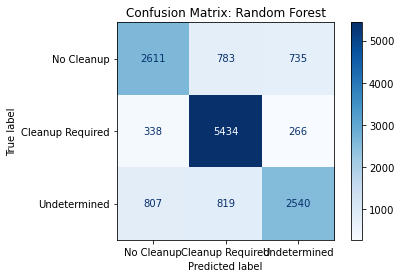

In [137]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['No Cleanup', 'Cleanup Required', 'Undetermined']
disp = plot_confusion_matrix(randomForest_clf_optuna, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)
plt.title('Confusion Matrix: Random Forest')

plt.show()

In [138]:
print(classification_report(y_test, y_test_pred, target_names=class_names))

                  precision    recall  f1-score   support

      No Cleanup       0.70      0.63      0.66      4129
Cleanup Required       0.77      0.90      0.83      6038
    Undetermined       0.72      0.61      0.66      4166

        accuracy                           0.74     14333
       macro avg       0.73      0.71      0.72     14333
    weighted avg       0.73      0.74      0.73     14333



Feature: Amt of Assessment Funding, Score: 0.16575
Feature: 2010 % Below Poverty, Score: 0.17928
Feature: ASSESSMENT YEAR, Score: 0.11211
Feature: Cntmnt Fnd-Arsenic_N, Score: 0.00008
Feature: Cntmnt Fnd-Arsenic_Y, Score: 0.01247
Feature: Cntmnt Fnd-Asbestos_N, Score: 0.00106
Feature: Cntmnt Fnd-Asbestos_Y, Score: 0.08126
Feature: Cntmnt Fnd-Chromium_N, Score: 0.00000
Feature: Cntmnt Fnd-Chromium_Y, Score: 0.00762
Feature: Cntmnt Fnd-Lead_N, Score: 0.00086
Feature: Cntmnt Fnd-Lead_Y, Score: 0.05614
Feature: Cntmnt Fnd-Lead_x, Score: 0.00004
Feature: Cntmnt Fnd-Mercury_Y, Score: 0.00678
Feature: Cntmnt Fnd-PAHs_N, Score: 0.00114
Feature: Cntmnt Fnd-PAHs_Y, Score: 0.02857
Feature: Cntmnt Fnd-PCBs_N, Score: 0.00087
Feature: Cntmnt Fnd-PCBs_Y, Score: 0.01548
Feature: Cntmnt Fnd-Petroleum_N, Score: 0.00077
Feature: Cntmnt Fnd-Petroleum_Y, Score: 0.05680
Feature: Cntmnt Fnd-Petroleum_x, Score: 0.00001
Feature: Cntmnt Fnd-SVOCs_N, Score: 0.00039
Feature: Cntmnt Fnd-SVOCs_Y, Score: 0.00728
Fea

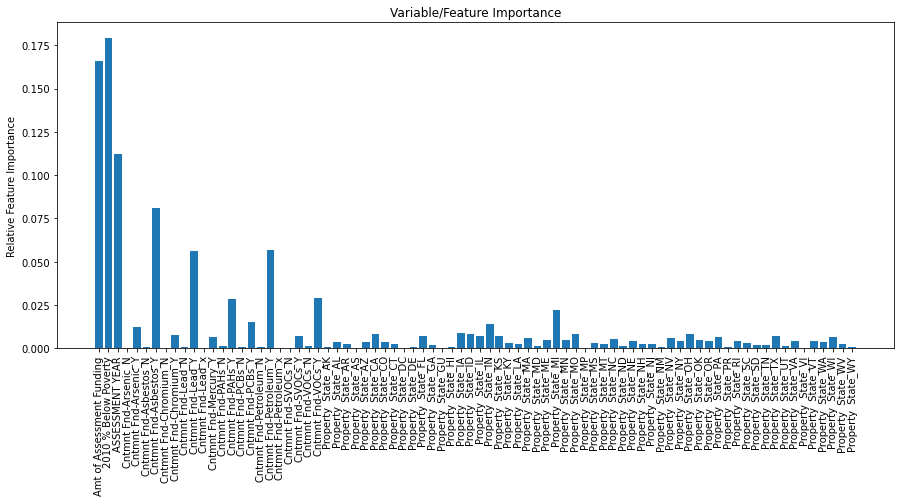

In [139]:
# feature names for later use with importance
feature_list = list(X_train.columns)
#feature_list

# get importance
importance = randomForest_clf_optuna.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_list[i],v))
# plot feature importance
plt.figure(figsize=(15,6))
pyplot.bar(feature_list, importance)
pyplot.xticks(rotation=90)
pyplot.ylabel('Relative Feature Importance')
pyplot.title('Variable/Feature Importance')
pyplot.show()

In [35]:
#svc_disp = plot_roc_curve(randomForest_clf_optuna, X_test, y_test)
#plt.plot([0,1], [0,1], 'k--') #dashed diagonal
#svc_disp_opt = plot_roc_curve(randomForest_clf_optuna, X_test, y_test)

#plt.show()

In [ ]:
# AUC Friday night: 0.92 - for binary y, n classification

In [123]:
# Y, N, U
# Accuracy = sunday: 0.71 - added Assessment year
# Accuracy = sunday: 0.76 - added Assessment year, and State